In [1]:
# 패키지 준비
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv 파일에서 데이터 읽기
cctv_in_seoul = pd.read_csv('data-files/cctv-in-seoul.csv', encoding="utf-8")
cctv_in_seoul.info()
cctv_in_seoul.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# 컬럼 이름 변경
cctv_in_seoul.rename(columns={'기관명' : '구별'}, inplace=True)
cctv_in_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# !chcp 65001
# !pip install xlrd

Active code page: 65001


In [16]:
# 인구 현황 데이터 준비
# pd.read_excel('data-files/population-in-seoul.xls') # 전체 데이터 확인
pop_seoul = pd.read_excel('data-files/population-in-seoul.xls',
                          header=2,
                          usecols='B, D, G, J, N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
columns = pop_seoul.columns
column_map = { c1 : c2 for c1, c2 in zip(columns, ["구별", "인구수", "한국인", "외국인", "고령자" ]) }

In [21]:
# 컬럼 이름 변경
# pop_seoul.rename(columns = { "자치구" : "구별", "계" : "인구수", "계.1" : "한국인", "계.2" : "외국인", "65세이상고령자" : "고령자" },
pop_seoul.rename(columns = column_map,
                 inplace=True)
pop_seoul.head()               

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [22]:
cctv_in_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [26]:
# CCTV가 많은 구 / CCTV가 적은 구
cctv_in_seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [32]:
cctv_in_seoul.iloc[:, 3:6] # 모든 행(:)의 3열, 4열, 5열(3:6) 데이터 반환
cctv_in_seoul.iloc[:, 3:6].sum(axis=1) # 모든 행(:)의 3열, 4열, 5열(3:6) 데이터를 행 별로 합계
cctv_in_seoul.iloc[:, 3:6].sum(axis=1) / cctv_in_seoul.iloc[:,2] * 100

0     150.619195
1     166.490765
2     125.203252
3     134.793814
4     149.290780
5      53.228621
6      64.973730
7     100.000000
8     188.929889
9     246.638655
10     74.766355
11    139.338235
12    212.101911
13     48.578199
14     63.371266
15     81.780822
16     63.627354
17    104.347826
18     34.671731
19    157.979798
20     53.216374
21     85.237258
22    248.922414
23    147.699758
24     79.960707
dtype: float64

In [47]:
# 증가율 컬럼 추가
cctv_in_seoul['최근증가율'] = cctv_in_seoul.iloc[:,3:6].sum(axis=1) / cctv_in_seoul.iloc[:,2] * 100
cctv_in_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266
16,성북구,1464,1009,78,360,204,63.627354
6,구로구,1561,1142,173,246,323,64.973730
10,동대문구,1294,1070,23,198,579,74.766355
24,중랑구,660,509,121,177,109,79.960707
15,성동구,1062,730,91,241,265,81.780822


In [53]:
pop_seoul.drop([0], axis=0, inplace=True) # 0번째 행 제거
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [56]:
pop_seoul[pop_seoul['구별'].isnull()] # NaN이 포함된 행 찾기

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [59]:
pop_seoul.drop([26], axis=0, inplace=True) # 26번 행 제거
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [61]:
# 컬럼 추가 (고령자비율, 외국인비율)
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul.loc[:,'고령자'] / pop_seoul.loc[:,'인구수'] * 100

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [65]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [69]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [72]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [84]:
# 두 데이터프레임 결합
cctv_pop_seoul = pd.merge(cctv_in_seoul, pop_seoul, on="구별")
cctv_pop_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [85]:
cctv_pop_seoul.columns[2:6]

Index(['2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [86]:
# 특정 컬럼 제거
# del cctv_pop_seoul['2013년도 이전']

cctv_pop_seoul.drop(cctv_pop_seoul.columns[2:6], axis=1, inplace=True)
cctv_pop_seoul.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [87]:
# 인덱스(행식별자)를 변경
cctv_pop_seoul.set_index('구별', inplace=True)
# cctv_pop_seoul.reset_index(drop=True) # 기존 행식별자 제거

cctv_pop_seoul.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [91]:
# 상관계수 확인 (수치형 변수 사이의 상관관계 정도)
print( np.corrcoef(cctv_pop_seoul['외국인비율'], cctv_pop_seoul["소계"]) )
print( np.corrcoef(cctv_pop_seoul['고령자비율'], cctv_pop_seoul["소계"]) )
print( np.corrcoef(cctv_pop_seoul['인구수'], cctv_pop_seoul["소계"]) )

[[ 1.         -0.13607433]
 [-0.13607433  1.        ]]
[[ 1.         -0.28078554]
 [-0.28078554  1.        ]]
[[1.         0.30634228]
 [0.30634228 1.        ]]


In [92]:
# 상관계수 확인( 검정 값 포함)
import scipy as sp
print( sp.stats.pearsonr(cctv_pop_seoul['외국인비율'], cctv_pop_seoul["소계"]) )
print( sp.stats.pearsonr(cctv_pop_seoul['고령자비율'], cctv_pop_seoul["소계"]) )
print( sp.stats.pearsonr(cctv_pop_seoul['인구수'], cctv_pop_seoul["소계"]) )

(-0.13607432878194448, 0.5166185539061332)
(-0.28078553790050065, 0.17395986608518685)
(0.30634227936792635, 0.13638968922289837)


In [95]:
# 인덱스를 일반 컬럼으로 변경 
cctv_pop_seoul2 = cctv_pop_seoul.reset_index()
cctv_pop_seoul2.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


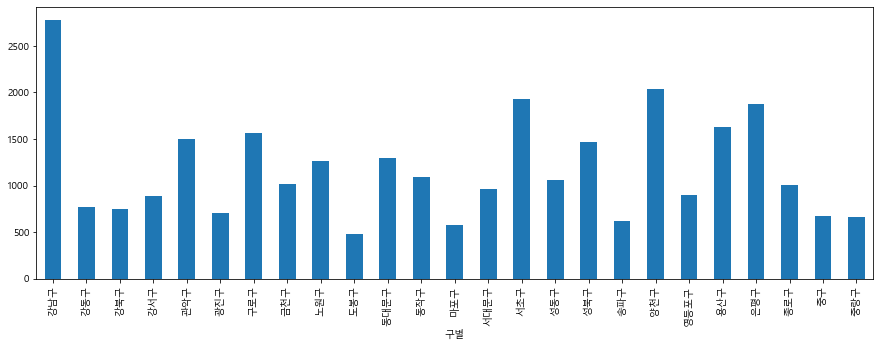

In [117]:
# plt.figure(figsize=(15, 5))
# plt.bar(x=cctv_pop_seoul2['구별'], height=cctv_pop_seoul['소계'])
# plt.show()

plt.figure(figsize=(15, 5))
cctv_pop_seoul['소계'].plot(kind='bar')
plt.show()
